## Project Overview

This project analyzes a retail superstore dataset to uncover insights related to sales performance, profitability, customer segments, regional performance, and the impact of discounts. The objective is to derive data-driven insights that can support better business decisions.


### Data Overview

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales_data = pd.read_excel(r"C:\Users\Beebrazz\Documents\sales-data-analysis\Superstore.xls")
sales_data


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [116]:
# Basic Dataset info

sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [117]:
# Summary Statistics

sales_data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


### Data Cleaning & Preparation

In [118]:
# Checking missing values

sales_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [119]:
# Checking for duplicates

sales_data.duplicated().sum()

np.int64(0)

In [120]:
# Converting date columns to datetime

sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
sales_data['Ship Date'] = pd.to_datetime(sales_data['Ship Date'])

In [121]:
# Creating columns for year and month

sales_data['Year'] = sales_data['Order Date'].dt.year
sales_data['Month'] = sales_data['Order Date'].dt.month

### Overall Sales and Profit Analysis

In [192]:
overall = sales_data[['Sales', 'Profit']].sum()
overall

Sales     2.297201e+06
Profit    2.863970e+05
dtype: float64

In [123]:
sales_data.groupby('Year')[['Sales', 'Profit']].sum()

,Sales,Profit
Year,,
2014,484247.4981,49543.9741
2015,470532.5090,61618.6037
2016,609205.5980,81795.1743
2017,733215.2552,93439.2696


### Time-Based Trends

In [124]:
monthly_sales = sales_data.groupby(['Year','Month'])['Sales'].sum().reset_index()

In [125]:
# creating a new column(YearMonth)
monthly_sales['Year_month'] = pd.to_datetime(
    monthly_sales['Year'].astype(str) + '-' +
    monthly_sales['Month'].astype(str)
)
monthly_sales = monthly_sales.sort_values('Year_month')

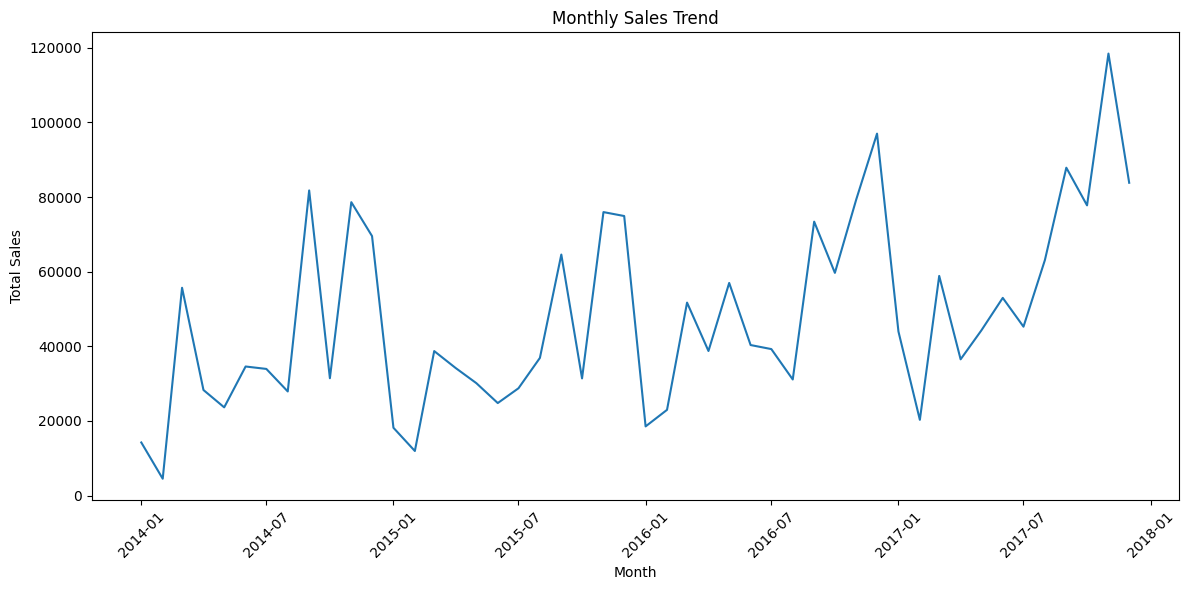

In [126]:
plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Year_month'], monthly_sales['Sales'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**  
Sales show an overall upward trend over time, with noticeable peaks toward the end of each year, suggesting possible seasonal demand.

In [127]:
# Getting the month with the best sales

best_sales_month = sales_data.groupby(['Year','Month'])['Sales'].sum().reset_index()
best_sales_month = best_sales_month.sort_values(by='Sales', ascending=False)
best_sales_month.head(1)

,Year,Month,Sales
46,2017,11,118447.825


In [128]:
# Getting the month with the least sales

best_sales_month = sales_data.groupby(['Year','Month'])['Sales'].sum().reset_index()
best_sales_month = best_sales_month.sort_values(by='Sales')
best_sales_month.head(1)

,Year,Month,Sales
1,2014,2,4519.892


In [129]:
profit = sales_data.groupby(['Year','Month'])['Profit'].sum().reset_index()

In [130]:
profit['Year_month'] = pd.to_datetime(
    profit['Year'].astype(str) + '-' +
    profit['Month'].astype(str)
)
profit = profit.sort_values('Year_month')

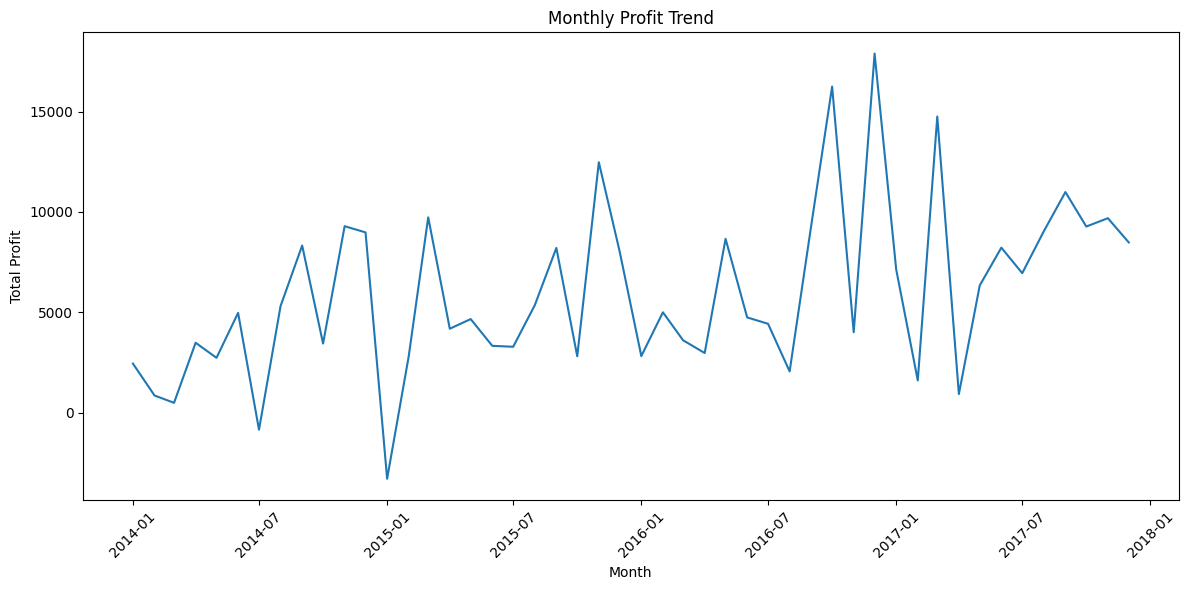

In [131]:
plt.figure(figsize=(12,6))
plt.plot(profit['Year_month'], profit['Profit'])
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.title('Monthly Profit Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**  
Profit trends are less consistent compared to sales, indicating fluctuations that may be influenced by discounting strategies or operational costs.

In [139]:
# Getting the month with the best profit

best_profit_month = sales_data.groupby(['Year','Month'])['Profit'].sum().reset_index()
best_profit_month = best_profit_month.sort_values(by='Profit', ascending=False)
best_profit_month.head(1)

,Year,Month,Profit
35,2016,12,17885.3093


In [140]:
# Getting the month with the least profit

least_profit_month = sales_data.groupby(['Year','Month'])['Profit'].sum().reset_index()
least_profit_month = least_profit_month.sort_values(by='Profit')
least_profit_month.head(1)

,Year,Month,Profit
12,2015,1,-3281.007


### Category & Sub-Category Analysis

In [145]:
Category = sales_data.groupby('Category')[['Sales','Profit']].sum()
Category.sort_values(by='Profit', ascending=False)

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Office Supplies,719047.0320,122490.8008
Furniture,741999.7953,18451.2728


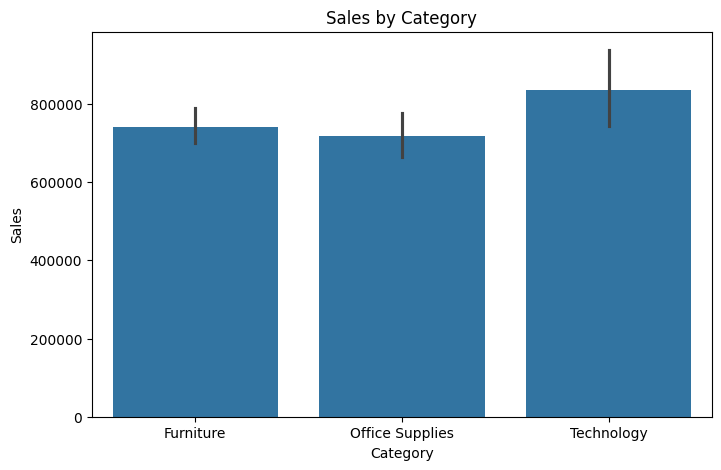

In [194]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=sales_data,
    x='Category',
    y='Sales',
    estimator=sum
)
plt.title('Sales by Category')
plt.show()

**Insight:**  
The Technology category generates the highest sales, followed by Furniture and Office Supplies, indicating strong customer demand for technology-related products.

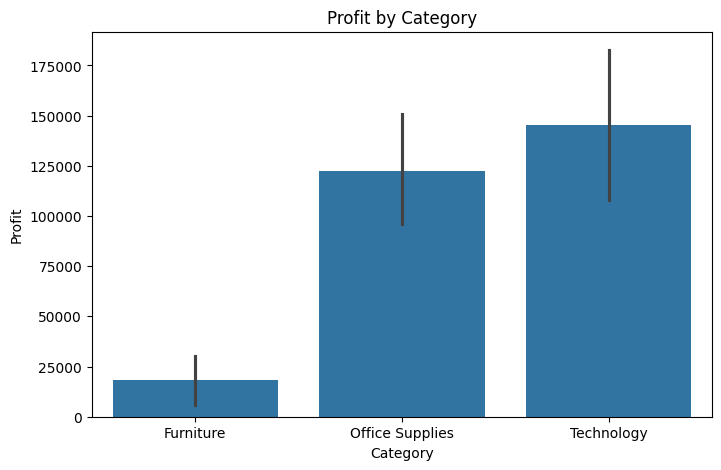

In [182]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=sales_data,
    x='Category',
    y='Profit',
    estimator=sum
)
plt.title('Profit by Category')
plt.show()

**Insight:**  
Although Technology leads in profit, Furniture shows comparatively lower profitability, suggesting thinner margins or higher costs within that category.

In [148]:
sub_category = sales_data.groupby('Sub-Category')[['Sales','Profit']].sum()
sub_category.sort_values(by='Profit', ascending=False)

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328449.1030,26590.1663
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


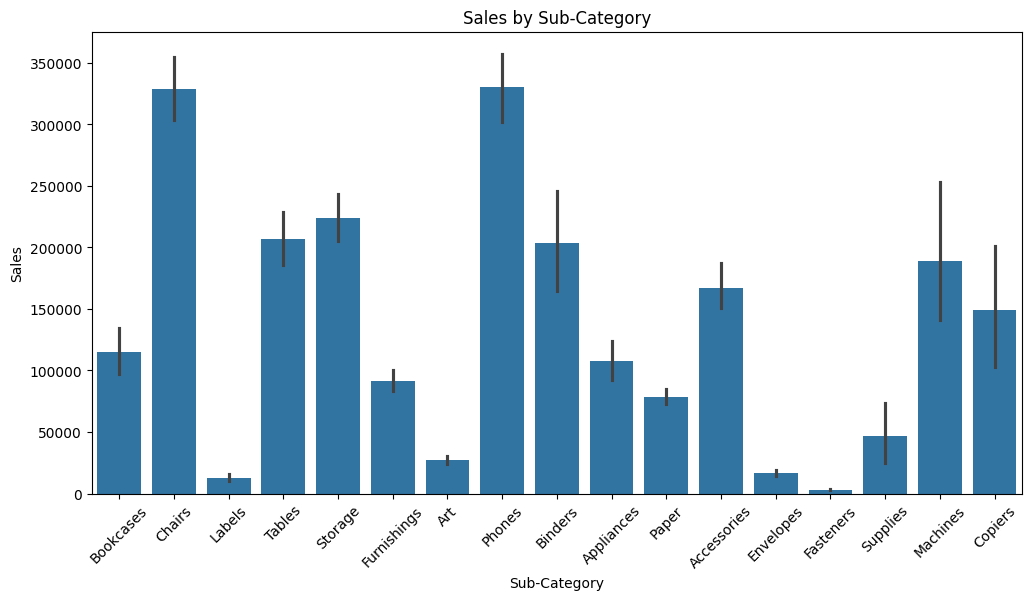

In [195]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=sales_data,
    x='Sub-Category',
    y='Sales',
    estimator=sum
)
plt.xticks(rotation=45)
plt.title('Sales by Sub-Category')
plt.show()

**Insight:**  
Sales performance varies significantly across sub-categories, with some products contributing heavily to revenue while others generate relatively low sales.

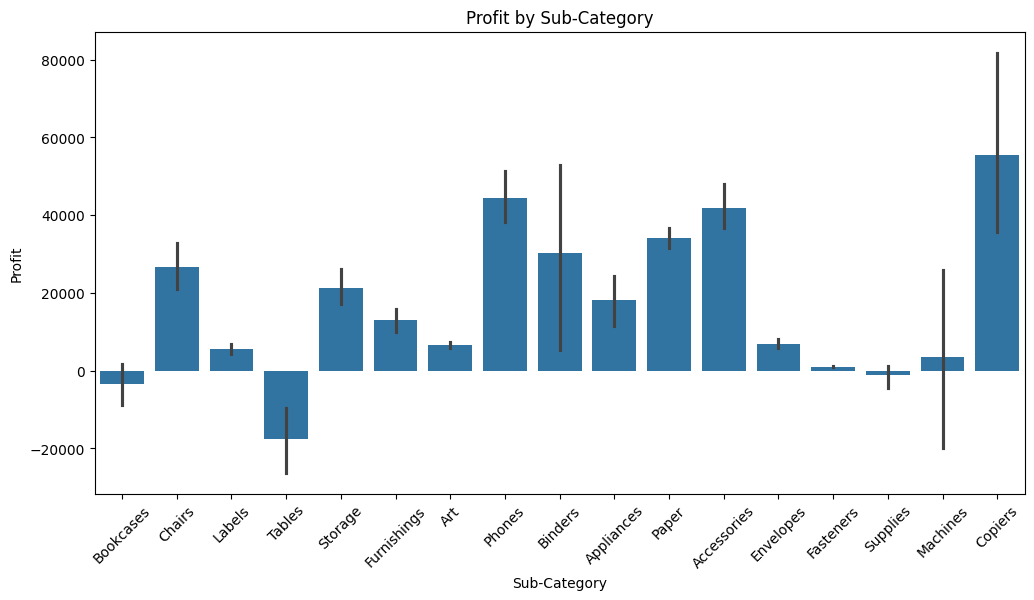

In [181]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=sales_data,
    x='Sub-Category',
    y='Profit',
    estimator=sum
)
plt.xticks(rotation=45)
plt.title('Profit by Sub-Category')
plt.show()


**Insight:**  
Several sub-categories record negative profit despite generating sales, highlighting potential loss-making products that may require review.

In [150]:
segment = sales_data.groupby('Segment')[['Sales','Profit']].sum()
segment.sort_values(by='Profit', ascending=False)

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.296531e+05,60298.6785


### Discount Impact Analysis

In [156]:
disc_impact = sales_data.groupby('Discount')['Profit'].mean().reset_index()
disc_impact

,Discount,Profit
0,0.00,66.900292
1,0.10,96.055074
2,0.15,27.288298
3,0.20,24.702572
4,0.30,-45.679636
5,0.32,-88.560656
6,0.40,-111.927429
7,0.45,-226.646464
8,0.50,-310.703456
9,0.60,-43.077212


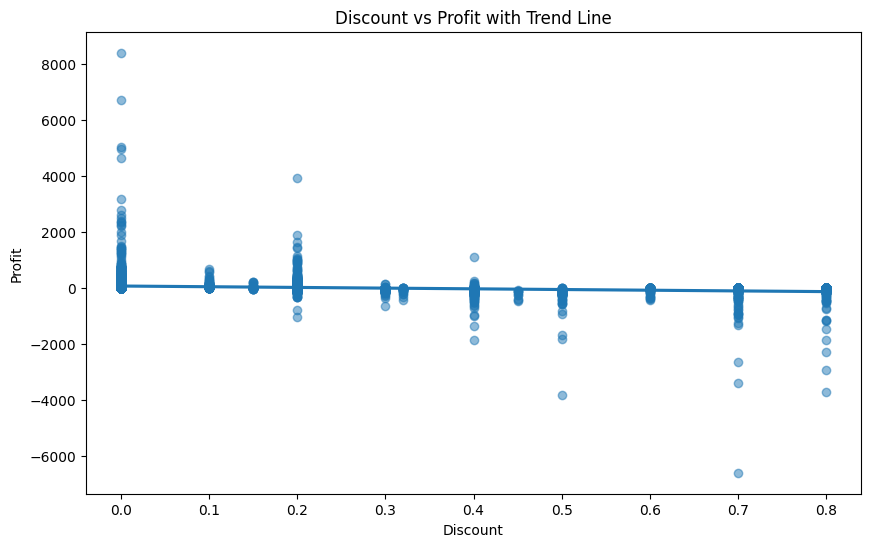

In [180]:
plt.figure(figsize=(10,6))
sns.regplot(data=sales_data, x='Discount', y='Profit', scatter_kws={'alpha':0.5})
plt.title('Discount vs Profit with Trend Line')
plt.show()

**Insight:**  
Higher discount levels are associated with lower average profit, suggesting that aggressive discounting negatively impacts profitability.

### Shipping & Operational Insights

In [ ]:
sales_data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [197]:
ship_mode = sales_data.groupby('Ship Mode')['Profit'].sum().reset_index()
ship_mode.sort_values(by='Profit', ascending=False)

,Ship Mode,Profit
3,Standard Class,164088.7875
2,Second Class,57446.6354
0,First Class,48969.8399
1,Same Day,15891.7589


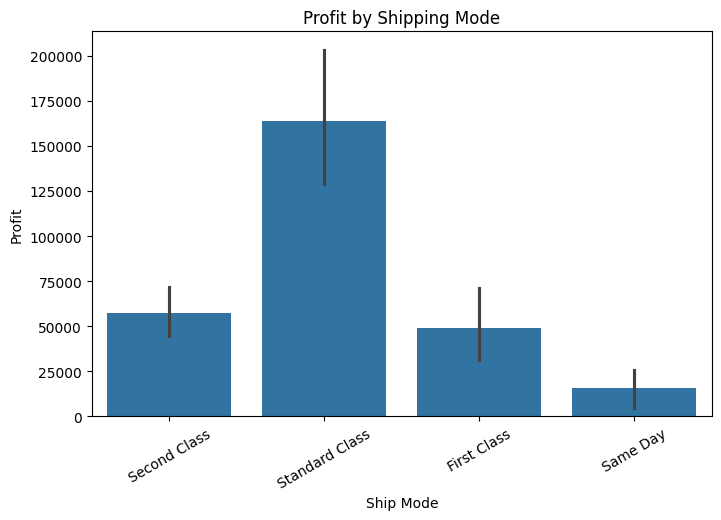

In [183]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=sales_data,
    x='Ship Mode',
    y='Profit',
    estimator=sum
)
plt.xticks(rotation=30)
plt.title('Profit by Shipping Mode')
plt.show()

**Insight:**  
Profitability varies by Ship mode, with the Standard Class leading in profit, while other modes show lower profit.


### Key Insights & Recommendations

- The Technology category generated the highest profit, while the Furniture category recorded the lowest profit among the major product categories.

- Although Furniture recorded relatively high sales, it generated low profit, indicating thin margins or high costs. Management should reassess pricing, costs, or promotional strategies within this category rather than completely eliminating it.

- At the sub-category level, Copiers generated the highest profit, while Tables recorded the lowest profit, highlighting significant variation in profitability across product lines.

- Sub-categories such as Supplies, Bookcases, and Tables consistently generated losses. These products should be reviewed for cost optimization, price adjustment, or possible discontinuation.

- The Consumer segment contributed the highest profit, while the Home Office segment generated the lowest profit, suggesting that individual consumers are the primary profit drivers.

- Standard Class shipping produced the highest profit, while Same Day shipping resulted in the lowest profit, likely due to higher fulfillment and logistics costs.

- Longer shipping times appear to be more profitable than faster delivery options, indicating that premium shipping services may not sufficiently cover their additional costs.